In [1]:
import os

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (16, 8)
matplotlib.rcParams['figure.dpi'] = 200

In [2]:
exp_path = os.path.join("pickle", "rand_l10_w6_n1000", "np6.pkl")
with open(exp_path, "rb") as f:
    exp = pickle.load(f)

In [3]:
def window_avg(arr, window_radius=10, x=None):
    window_size = 2*window_radius + 1
    if window_size > len(arr):
        raise ValueError(f"Window len {window_size} is larger than input len {len(arr)}")
    y = np.convolve(arr, np.ones((window_size,))/window_size, mode='valid')
    if x is None:
        x = np.arange(len(y)) + window_radius
    else:
        x = x[window_radius:-window_radius]
    return x, y

In [4]:
# A few parameters
dot_size = 2
window_rad = 10

Text(0, 0.5, 'Graph Execution Time (s)')

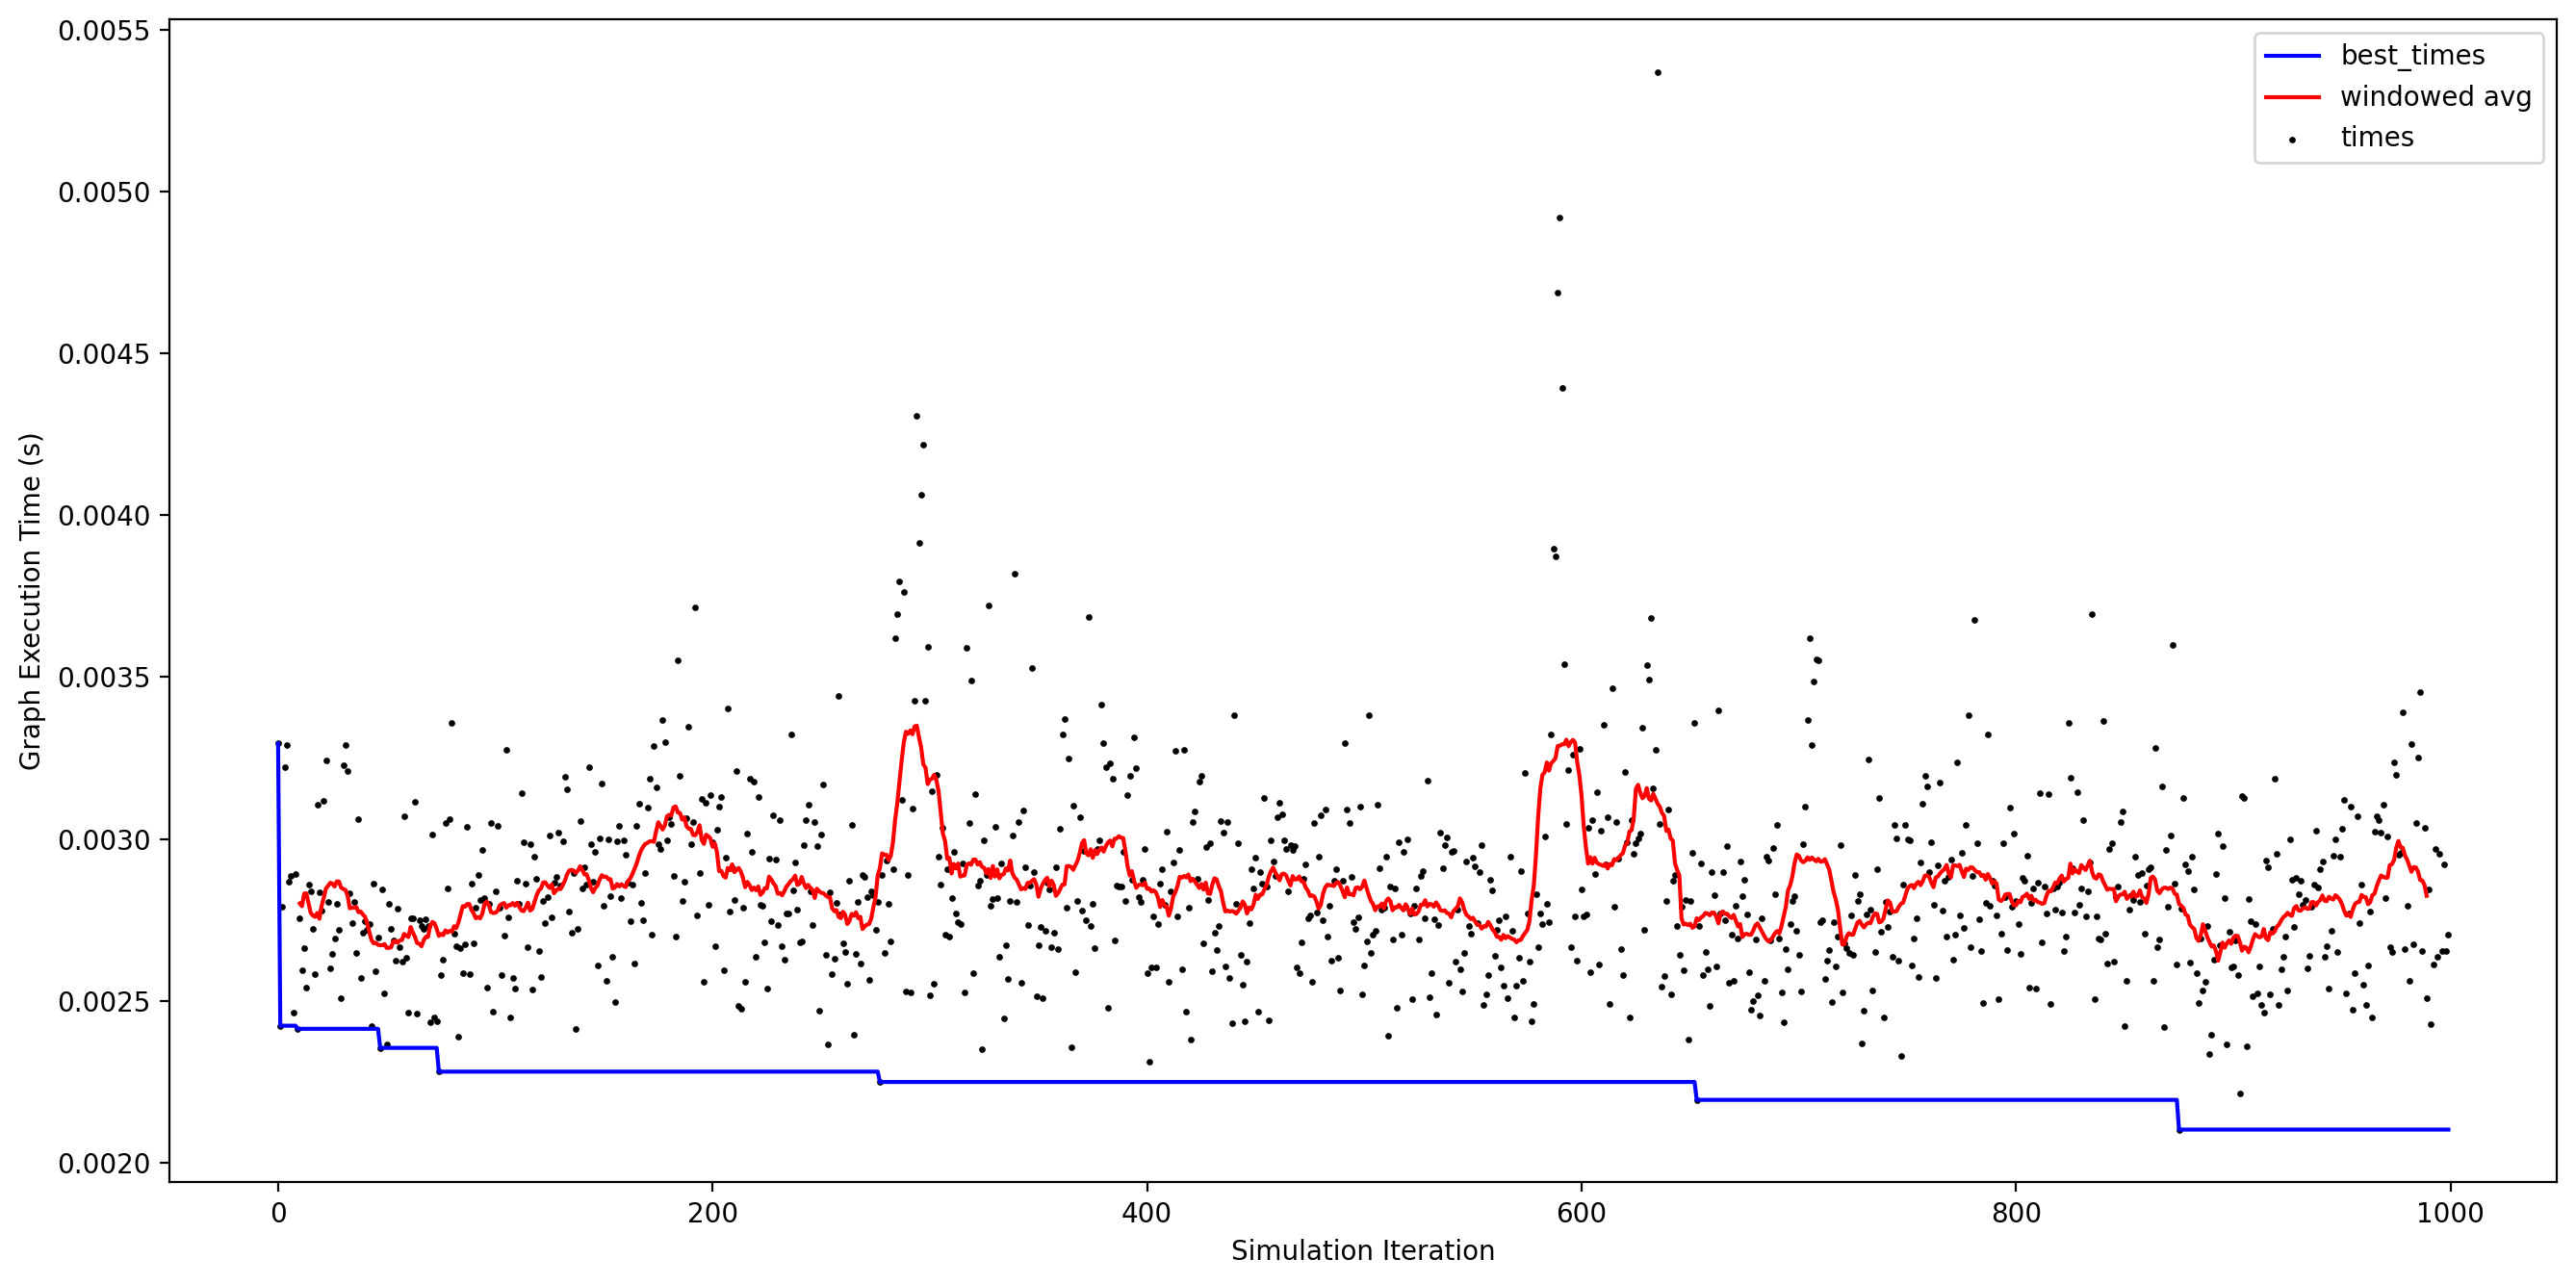

In [5]:
# Plot results over iterations
times = exp["results"]["times"]
best_times = exp["results"]["best_times"]
plt.scatter(np.arange(len(times)), times, c="black", s=dot_size, label="times")
plt.plot(best_times, "-b", label="best_times")
x, avg_times = window_avg(times, window_radius=window_rad)
plt.plot(x, avg_times, "-r", label="windowed avg")
plt.legend(loc="best")
plt.xlabel("Simulation Iteration")
plt.ylabel("Graph Execution Time (s)")
# plt.savefig("results_over_iters.png", dpi=200)

Text(0, 0.5, 'Graph Execution Time (s)')

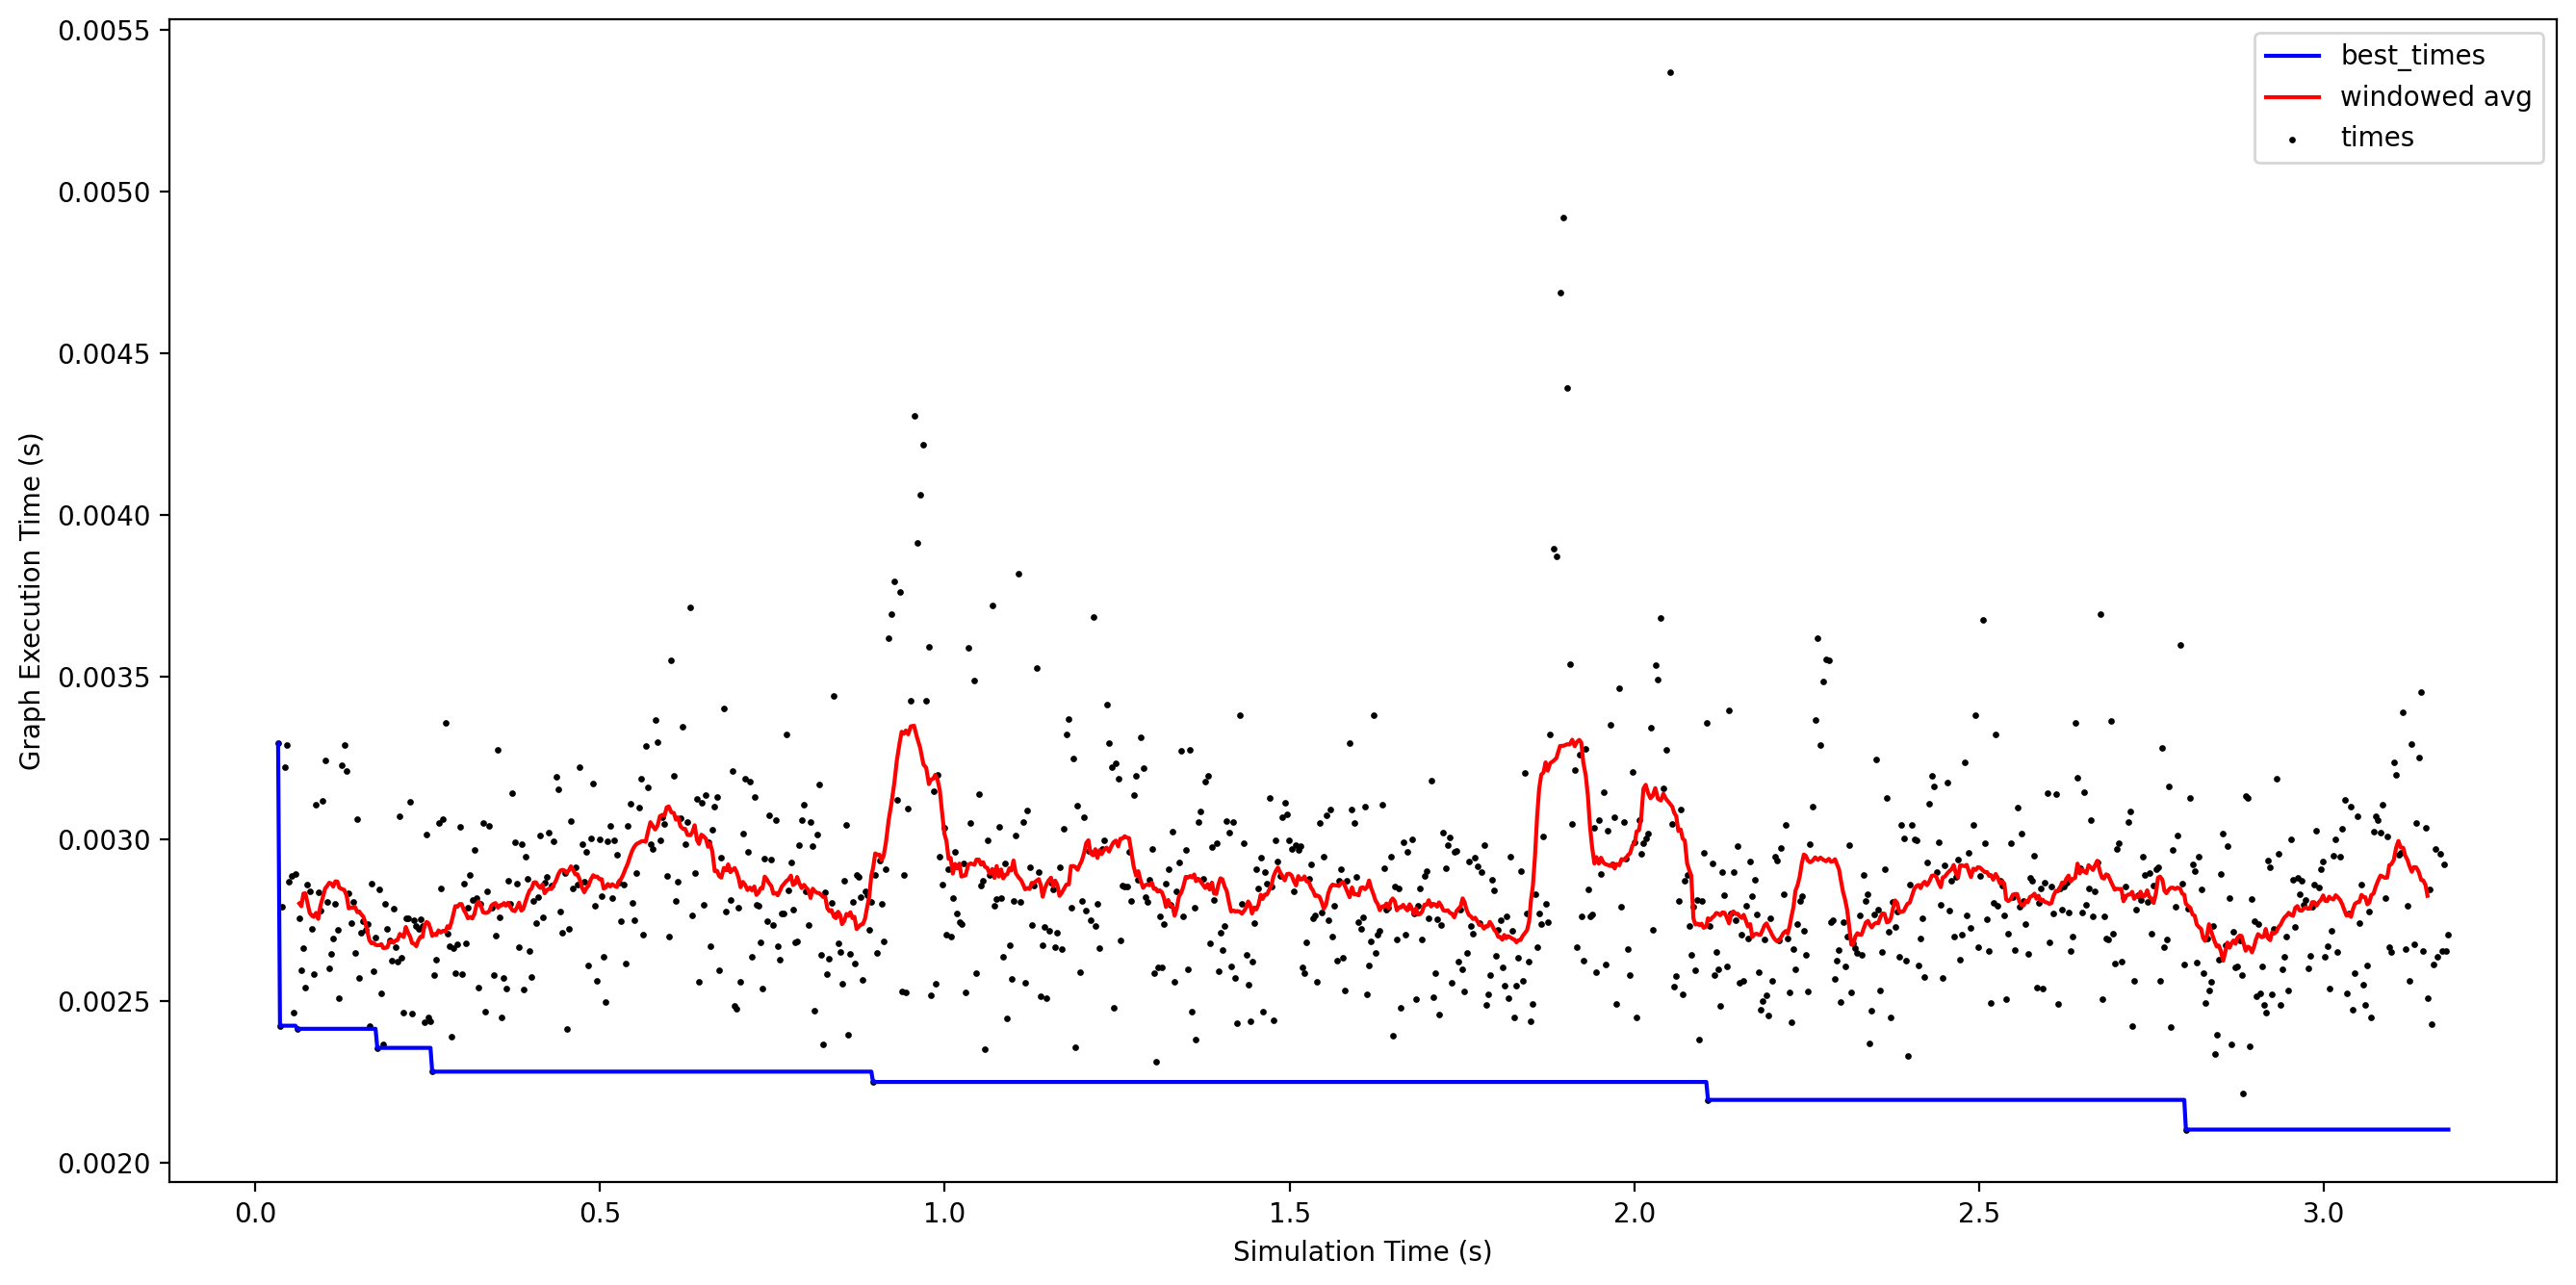

In [6]:
# Plot results over time
times = exp["results"]["times"]
iter_times = exp["results"]["iter_times"]
plt.scatter(iter_times, times, c="black", s=dot_size, label="times")
plt.plot(iter_times, best_times, "-b", label="best_times")
x, avg_times = window_avg(times, window_radius=window_rad, x=iter_times)
plt.plot(x, avg_times, "-r", label="windowed avg")
plt.legend(loc="best")
plt.xlabel("Simulation Time (s)")
plt.ylabel("Graph Execution Time (s)")
# plt.savefig("results_over_time.png", dpi=200)